In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from collections import defaultdict, Counter, deque
from typing import Tuple, List, Set, Dict, Counter
from typing import Any, Sequence, Mapping, Iterable, Iterator
from itertools import product, chain, islice
import numpy as np
import seaborn as sns
import sys
from sys import maxsize
from itertools import permutations
import copy

In [91]:
def the_wobler(points):
    ''' takes 2 points and reorders their coords so that we can plot the line between them'''
    a = points[0]
    b = points[1]
    return [[a[0], b[0]], [a[1],b[1]]]

def Distance(city: (int,int) , plant: (int,int)):
    x = math.sqrt( (plant[0]-city[0])**2 + (plant[1]-city[1])**2   )
    return x

def find_edge(edge): 
    '''Finds the index of a specific edge, you input the edge as a tuple (a,b), 
    where a and b are the original names of the vertices, and it gives you the index of that edge in the Edges list.
    IMPORTANT: put the lowest one first, a<b.'''
    global numV
    index =0
    for i in range(1, edge[0]):
        index = index + numV-i
    index = index + (edge[1]-edge[0])
    index = index + (numV*(numV-3)*(numV-1))
    return index

def power_set(my_set):
    result = [[]]
    for i in my_set:
        n = len(result)

        for j in range(n):
            r = result[j] + [i]
            result.append(r)
    return result

In [3]:
#Data = pd.DataFrame({'name':['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10'],'coords':[(0,0), (1000, 0), (500, 0), (500, 866), (250, 433), (750, 433), (500, 288), (375, 360), (625, 360), (500, 144)], 'energy':[100]*10})

In [4]:
#input the data

Data = pd.DataFrame({'name':['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15'], 'coords':[(300, 100),(600, 100),(700, 200 ),(900, 700 ),(500, 500 ),(400, 900),(150, 100), (400, 80  ), (950 ,70  ), (30 ,120  ), (600, 300), (20 ,450  ), (300, 500), (950 ,450),( 70 ,800   ),(350 ,750 ), (500 ,750 ),  (600, 800  ),(600 ,900  ), (750 ,750 ),( 850 ,950)
] , 'energy':[900, 500, 1200, 450, 750, 1200, 200, 300, 200, 250, 300, 250, 300, 300, 250, 150, 250, 300, 100, 250, 250] })


In [5]:
Verts = Data[['coords']]
Verts.index = np.arange(1, len(Verts) + 1) #make index start with 1 so that we can use them as the names for vertices.
numV = len(Data)
numBi = numV -1 + numV -3

In [6]:
Edges = []
for bi_num in range(1, numV+1): #bi_num is the index that keeps track of which bipartite are we looking at
    first_vert = numBi*(bi_num-1)+1
    for i in range(first_vert, first_vert + (numV-3)): #the 18 first vertices will only be connected to the other side
        for j in range(first_vert+(numV-3), first_vert + numBi): #complete the bipart graph 
            Edges += [(i, j, 1)]
            
#we've taken care of the dummy vertices, now we have to make the edges that correspond to the original graph
for bi_num in range(1, numV):
    first_good_vert = numBi*(bi_num-1)+numV-2
    for k in range(bi_num, numV):
        Edges += [(first_good_vert+(k-1), numBi*k+(numV-3)+bi_num, -Distance(Verts.loc[bi_num][0], Verts.loc[k+1][0])+1500)]

# code from NetworkX:

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.matching.max_weight_matching.html

In [7]:
"""Functions for computing and verifying matchings in a graph."""
from collections import Counter
from itertools import combinations, repeat

import networkx as nx
from networkx.utils import not_implemented_for

__all__ = [
    "is_matching",
    "is_maximal_matching",
    "is_perfect_matching",
    "max_weight_matching",
    "min_weight_matching",
    "maximal_matching",
]


@not_implemented_for("multigraph")
@not_implemented_for("directed")
def maximal_matching(G):
    r"""Find a maximal matching in the graph.

    A matching is a subset of edges in which no node occurs more than once.
    A maximal matching cannot add more edges and still be a matching.

    Parameters
    ----------
    G : NetworkX graph
        Undirected graph

    Returns
    -------
    matching : set
        A maximal matching of the graph.

    Examples
    --------
    >>> G = nx.Graph([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5)])
    >>> sorted(nx.maximal_matching(G))
    [(1, 2), (3, 5)]

    Notes
    -----
    The algorithm greedily selects a maximal matching M of the graph G
    (i.e. no superset of M exists). It runs in $O(|E|)$ time.
    """
    matching = set()
    nodes = set()
    for edge in G.edges():
        # If the edge isn't covered, add it to the matching
        # then remove neighborhood of u and v from consideration.
        u, v = edge
        if u not in nodes and v not in nodes and u != v:
            matching.add(edge)
            nodes.update(edge)
    return matching



def matching_dict_to_set(matching):
    """Converts matching dict format to matching set format

    Converts a dictionary representing a matching (as returned by
    :func:`max_weight_matching`) to a set representing a matching (as
    returned by :func:`maximal_matching`).

    In the definition of maximal matching adopted by NetworkX,
    self-loops are not allowed, so the provided dictionary is expected
    to never have any mapping from a key to itself. However, the
    dictionary is expected to have mirrored key/value pairs, for
    example, key ``u`` with value ``v`` and key ``v`` with value ``u``.

    """
    edges = set()
    for edge in matching.items():
        u, v = edge
        if (v, u) in edges or edge in edges:
            continue
        if u == v:
            raise nx.NetworkXError(f"Selfloops cannot appear in matchings {edge}")
        edges.add(edge)
    return edges


def is_matching(G, matching):
    """Return True if ``matching`` is a valid matching of ``G``

    A *matching* in a graph is a set of edges in which no two distinct
    edges share a common endpoint. Each node is incident to at most one
    edge in the matching. The edges are said to be independent.

    Parameters
    ----------
    G : NetworkX graph

    matching : dict or set
        A dictionary or set representing a matching. If a dictionary, it
        must have ``matching[u] == v`` and ``matching[v] == u`` for each
        edge ``(u, v)`` in the matching. If a set, it must have elements
        of the form ``(u, v)``, where ``(u, v)`` is an edge in the
        matching.

    Returns
    -------
    bool
        Whether the given set or dictionary represents a valid matching
        in the graph.

    Raises
    ------
    NetworkXError
        If the proposed matching has an edge to a node not in G.
        Or if the matching is not a collection of 2-tuple edges.

    Examples
    --------
    >>> G = nx.Graph([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5)])
    >>> nx.is_maximal_matching(G, {1: 3, 2: 4})  # using dict to represent matching
    True

    >>> nx.is_matching(G, {(1, 3), (2, 4)})  # using set to represent matching
    True

    """
    if isinstance(matching, dict):
        matching = matching_dict_to_set(matching)

    nodes = set()
    for edge in matching:
        if len(edge) != 2:
            raise nx.NetworkXError(f"matching has non-2-tuple edge {edge}")
        u, v = edge
        if u not in G or v not in G:
            raise nx.NetworkXError(f"matching contains edge {edge} with node not in G")
        if u == v:
            return False
        if not G.has_edge(u, v):
            return False
        if u in nodes or v in nodes:
            return False
        nodes.update(edge)
    return True



def is_maximal_matching(G, matching):
    """Return True if ``matching`` is a maximal matching of ``G``

    A *maximal matching* in a graph is a matching in which adding any
    edge would cause the set to no longer be a valid matching.

    Parameters
    ----------
    G : NetworkX graph

    matching : dict or set
        A dictionary or set representing a matching. If a dictionary, it
        must have ``matching[u] == v`` and ``matching[v] == u`` for each
        edge ``(u, v)`` in the matching. If a set, it must have elements
        of the form ``(u, v)``, where ``(u, v)`` is an edge in the
        matching.

    Returns
    -------
    bool
        Whether the given set or dictionary represents a valid maximal
        matching in the graph.

    Examples
    --------
    >>> G = nx.Graph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
    >>> nx.is_maximal_matching(G, {(1, 2), (3, 4)})
    True

    """
    if isinstance(matching, dict):
        matching = matching_dict_to_set(matching)
    # If the given set is not a matching, then it is not a maximal matching.
    edges = set()
    nodes = set()
    for edge in matching:
        if len(edge) != 2:
            raise nx.NetworkXError(f"matching has non-2-tuple edge {edge}")
        u, v = edge
        if u not in G or v not in G:
            raise nx.NetworkXError(f"matching contains edge {edge} with node not in G")
        if u == v:
            return False
        if not G.has_edge(u, v):
            return False
        if u in nodes or v in nodes:
            return False
        nodes.update(edge)
        edges.add(edge)
        edges.add((v, u))
    # A matching is maximal if adding any new edge from G to it
    # causes the resulting set to match some node twice.
    # Be careful to check for adding selfloops
    for u, v in G.edges:
        if (u, v) not in edges:
            # could add edge (u, v) to edges and have a bigger matching
            if u not in nodes and v not in nodes and u != v:
                return False
    return True



def is_perfect_matching(G, matching):
    """Return True if ``matching`` is a perfect matching for ``G``

    A *perfect matching* in a graph is a matching in which exactly one edge
    is incident upon each vertex.

    Parameters
    ----------
    G : NetworkX graph

    matching : dict or set
        A dictionary or set representing a matching. If a dictionary, it
        must have ``matching[u] == v`` and ``matching[v] == u`` for each
        edge ``(u, v)`` in the matching. If a set, it must have elements
        of the form ``(u, v)``, where ``(u, v)`` is an edge in the
        matching.

    Returns
    -------
    bool
        Whether the given set or dictionary represents a valid perfect
        matching in the graph.

    Examples
    --------
    >>> G = nx.Graph([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6)])
    >>> my_match = {1: 2, 3: 5, 4: 6}
    >>> nx.is_perfect_matching(G, my_match)
    True

    """
    if isinstance(matching, dict):
        matching = matching_dict_to_set(matching)

    nodes = set()
    for edge in matching:
        if len(edge) != 2:
            raise nx.NetworkXError(f"matching has non-2-tuple edge {edge}")
        u, v = edge
        if u not in G or v not in G:
            raise nx.NetworkXError(f"matching contains edge {edge} with node not in G")
        if u == v:
            return False
        if not G.has_edge(u, v):
            return False
        if u in nodes or v in nodes:
            return False
        nodes.update(edge)
    return len(nodes) == len(G)



@not_implemented_for("multigraph")
@not_implemented_for("directed")
def min_weight_matching(G, weight="weight"):
    """Computing a minimum-weight maximal matching of G.

    Use the maximum-weight algorithm with edge weights subtracted
    from the maximum weight of all edges.

    A matching is a subset of edges in which no node occurs more than once.
    The weight of a matching is the sum of the weights of its edges.
    A maximal matching cannot add more edges and still be a matching.
    The cardinality of a matching is the number of matched edges.

    This method replaces the edge weights with 1 plus the maximum edge weight
    minus the original edge weight.

    new_weight = (max_weight + 1) - edge_weight

    then runs :func:`max_weight_matching` with the new weights.
    The max weight matching with these new weights corresponds
    to the min weight matching using the original weights.
    Adding 1 to the max edge weight keeps all edge weights positive
    and as integers if they started as integers.

    You might worry that adding 1 to each weight would make the algorithm
    favor matchings with more edges. But we use the parameter
    `maxcardinality=True` in `max_weight_matching` to ensure that the
    number of edges in the competing matchings are the same and thus
    the optimum does not change due to changes in the number of edges.

    Read the documentation of `max_weight_matching` for more information.

    Parameters
    ----------
    G : NetworkX graph
      Undirected graph

    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight.
       If key not found, uses 1 as weight.

    Returns
    -------
    matching : set
        A minimal weight matching of the graph.

    See Also
    --------
    max_weight_matching
    """
    if len(G.edges) == 0:
        return max_weight_matching(G, maxcardinality=True, weight=weight)
    G_edges = G.edges(data=weight, default=1)
    max_weight = 1 + max(w for _, _, w in G_edges)
    InvG = nx.Graph()
    edges = ((u, v, max_weight - w) for u, v, w in G_edges)
    InvG.add_weighted_edges_from(edges, weight=weight)
    return max_weight_matching(InvG, maxcardinality=True, weight=weight)



@not_implemented_for("multigraph")
@not_implemented_for("directed")
def max_weight_matching(G, maxcardinality=True, weight="weight"):
    """Compute a maximum-weighted matching of G.

    A matching is a subset of edges in which no node occurs more than once.
    The weight of a matching is the sum of the weights of its edges.
    A maximal matching cannot add more edges and still be a matching.
    The cardinality of a matching is the number of matched edges.

    Parameters
    ----------
    G : NetworkX graph
      Undirected graph

    maxcardinality: bool, optional (default=False)
       If maxcardinality is True, compute the maximum-cardinality matching
       with maximum weight among all maximum-cardinality matchings.

    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight.
       If key not found, uses 1 as weight.


    Returns
    -------
    matching : set
        A maximal matching of the graph.

     Examples
    --------
    >>> G = nx.Graph()
    >>> edges = [(1, 2, 6), (1, 3, 2), (2, 3, 1), (2, 4, 7), (3, 5, 9), (4, 5, 3)]
    >>> G.add_weighted_edges_from(edges)
    >>> sorted(nx.max_weight_matching(G))
    [(2, 4), (5, 3)]

    Notes
    -----
    If G has edges with weight attributes the edge data are used as
    weight values else the weights are assumed to be 1.

    This function takes time O(number_of_nodes ** 3).

    If all edge weights are integers, the algorithm uses only integer
    computations.  If floating point weights are used, the algorithm
    could return a slightly suboptimal matching due to numeric
    precision errors.

    This method is based on the "blossom" method for finding augmenting
    paths and the "primal-dual" method for finding a matching of maximum
    weight, both methods invented by Jack Edmonds [1]_.

    Bipartite graphs can also be matched using the functions present in
    :mod:`networkx.algorithms.bipartite.matching`.

    References
    ----------
    .. [1] "Efficient Algorithms for Finding Maximum Matching in Graphs",
       Zvi Galil, ACM Computing Surveys, 1986.
    """
    #
    # The algorithm is taken from "Efficient Algorithms for Finding Maximum
    # Matching in Graphs" by Zvi Galil, ACM Computing Surveys, 1986.
    # It is based on the "blossom" method for finding augmenting paths and
    # the "primal-dual" method for finding a matching of maximum weight, both
    # methods invented by Jack Edmonds.
    #
    # A C program for maximum weight matching by Ed Rothberg was used
    # extensively to validate this new code.
    #
    # Many terms used in the code comments are explained in the paper
    # by Galil. You will probably need the paper to make sense of this code.
    #

    class NoNode:
        """Dummy value which is different from any node."""

        pass

    class Blossom:
        """Representation of a non-trivial blossom or sub-blossom."""

        __slots__ = ["childs", "edges", "mybestedges"]

        # b.childs is an ordered list of b's sub-blossoms, starting with
        # the base and going round the blossom.

        # b.edges is the list of b's connecting edges, such that
        # b.edges[i] = (v, w) where v is a vertex in b.childs[i]
        # and w is a vertex in b.childs[wrap(i+1)].

        # If b is a top-level S-blossom,
        # b.mybestedges is a list of least-slack edges to neighbouring
        # S-blossoms, or None if no such list has been computed yet.
        # This is used for efficient computation of delta3.

        # Generate the blossom's leaf vertices.
        def leaves(self):
            for t in self.childs:
                if isinstance(t, Blossom):
                    yield from t.leaves()
                else:
                    yield t

    # Get a list of vertices.
    gnodes = list(G)
    if not gnodes:
        return set()  # don't bother with empty graphs

    # Find the maximum edge weight.
    maxweight = 0
    allinteger = True
    for i, j, d in G.edges(data=True):
        wt = d.get(weight, 1)
        if i != j and wt > maxweight:
            maxweight = wt
        allinteger = allinteger and (str(type(wt)).split("'")[1] in ("int", "long"))

    # If v is a matched vertex, mate[v] is its partner vertex.
    # If v is a single vertex, v does not occur as a key in mate.
    # Initially all vertices are single; updated during augmentation.
    mate = {}

    # If b is a top-level blossom,
    # label.get(b) is None if b is unlabeled (free),
    #                 1 if b is an S-blossom,
    #                 2 if b is a T-blossom.
    # The label of a vertex is found by looking at the label of its top-level
    # containing blossom.
    # If v is a vertex inside a T-blossom, label[v] is 2 iff v is reachable
    # from an S-vertex outside the blossom.
    # Labels are assigned during a stage and reset after each augmentation.
    label = {}

    # If b is a labeled top-level blossom,
    # labeledge[b] = (v, w) is the edge through which b obtained its label
    # such that w is a vertex in b, or None if b's base vertex is single.
    # If w is a vertex inside a T-blossom and label[w] == 2,
    # labeledge[w] = (v, w) is an edge through which w is reachable from
    # outside the blossom.
    labeledge = {}

    # If v is a vertex, inblossom[v] is the top-level blossom to which v
    # belongs.
    # If v is a top-level vertex, inblossom[v] == v since v is itself
    # a (trivial) top-level blossom.
    # Initially all vertices are top-level trivial blossoms.
    inblossom = dict(zip(gnodes, gnodes))

    # If b is a sub-blossom,
    # blossomparent[b] is its immediate parent (sub-)blossom.
    # If b is a top-level blossom, blossomparent[b] is None.
    blossomparent = dict(zip(gnodes, repeat(None)))

    # If b is a (sub-)blossom,
    # blossombase[b] is its base VERTEX (i.e. recursive sub-blossom).
    blossombase = dict(zip(gnodes, gnodes))

    # If w is a free vertex (or an unreached vertex inside a T-blossom),
    # bestedge[w] = (v, w) is the least-slack edge from an S-vertex,
    # or None if there is no such edge.
    # If b is a (possibly trivial) top-level S-blossom,
    # bestedge[b] = (v, w) is the least-slack edge to a different S-blossom
    # (v inside b), or None if there is no such edge.
    # This is used for efficient computation of delta2 and delta3.
    bestedge = {}

    # If v is a vertex,
    # dualvar[v] = 2 * u(v) where u(v) is the v's variable in the dual
    # optimization problem (if all edge weights are integers, multiplication
    # by two ensures that all values remain integers throughout the algorithm).
    # Initially, u(v) = maxweight / 2.
    dualvar = dict(zip(gnodes, repeat(maxweight)))

    # If b is a non-trivial blossom,
    # blossomdual[b] = z(b) where z(b) is b's variable in the dual
    # optimization problem.
    blossomdual = {}

    # If (v, w) in allowedge or (w, v) in allowedg, then the edge
    # (v, w) is known to have zero slack in the optimization problem;
    # otherwise the edge may or may not have zero slack.
    allowedge = {}

    # Queue of newly discovered S-vertices.
    queue = []

    # Return 2 * slack of edge (v, w) (does not work inside blossoms).
    def slack(v, w):
        return dualvar[v] + dualvar[w] - 2 * G[v][w].get(weight, 1)

    # Assign label t to the top-level blossom containing vertex w,
    # coming through an edge from vertex v.
    def assignLabel(w, t, v):
        b = inblossom[w]
        assert label.get(w) is None and label.get(b) is None
        label[w] = label[b] = t
        if v is not None:
            labeledge[w] = labeledge[b] = (v, w)
        else:
            labeledge[w] = labeledge[b] = None
        bestedge[w] = bestedge[b] = None
        if t == 1:
            # b became an S-vertex/blossom; add it(s vertices) to the queue.
            if isinstance(b, Blossom):
                queue.extend(b.leaves())
            else:
                queue.append(b)
        elif t == 2:
            # b became a T-vertex/blossom; assign label S to its mate.
            # (If b is a non-trivial blossom, its base is the only vertex
            # with an external mate.)
            base = blossombase[b]
            assignLabel(mate[base], 1, base)

    # Trace back from vertices v and w to discover either a new blossom
    # or an augmenting path. Return the base vertex of the new blossom,
    # or NoNode if an augmenting path was found.
    def scanBlossom(v, w):
        # Trace back from v and w, placing breadcrumbs as we go.
        path = []
        base = NoNode
        while v is not NoNode:
            # Look for a breadcrumb in v's blossom or put a new breadcrumb.
            b = inblossom[v]
            if label[b] & 4:
                base = blossombase[b]
                break
            assert label[b] == 1
            path.append(b)
            label[b] = 5
            # Trace one step back.
            if labeledge[b] is None:
                # The base of blossom b is single; stop tracing this path.
                assert blossombase[b] not in mate
                v = NoNode
            else:
                assert labeledge[b][0] == mate[blossombase[b]]
                v = labeledge[b][0]
                b = inblossom[v]
                assert label[b] == 2
                # b is a T-blossom; trace one more step back.
                v = labeledge[b][0]
            # Swap v and w so that we alternate between both paths.
            if w is not NoNode:
                v, w = w, v
        # Remove breadcrumbs.
        for b in path:
            label[b] = 1
        # Return base vertex, if we found one.
        return base

    # Construct a new blossom with given base, through S-vertices v and w.
    # Label the new blossom as S; set its dual variable to zero;
    # relabel its T-vertices to S and add them to the queue.
    def addBlossom(base, v, w):
        bb = inblossom[base]
        bv = inblossom[v]
        bw = inblossom[w]
        # Create blossom.
        b = Blossom()
        blossombase[b] = base
        blossomparent[b] = None
        blossomparent[bb] = b
        # Make list of sub-blossoms and their interconnecting edge endpoints.
        b.childs = path = []
        b.edges = edgs = [(v, w)]
        # Trace back from v to base.
        while bv != bb:
            # Add bv to the new blossom.
            blossomparent[bv] = b
            path.append(bv)
            edgs.append(labeledge[bv])
            assert label[bv] == 2 or (
                label[bv] == 1 and labeledge[bv][0] == mate[blossombase[bv]]
            )
            # Trace one step back.
            v = labeledge[bv][0]
            bv = inblossom[v]
        # Add base sub-blossom; reverse lists.
        path.append(bb)
        path.reverse()
        edgs.reverse()
        # Trace back from w to base.
        while bw != bb:
            # Add bw to the new blossom.
            blossomparent[bw] = b
            path.append(bw)
            edgs.append((labeledge[bw][1], labeledge[bw][0]))
            assert label[bw] == 2 or (
                label[bw] == 1 and labeledge[bw][0] == mate[blossombase[bw]]
            )
            # Trace one step back.
            w = labeledge[bw][0]
            bw = inblossom[w]
        # Set label to S.
        assert label[bb] == 1
        label[b] = 1
        labeledge[b] = labeledge[bb]
        # Set dual variable to zero.
        blossomdual[b] = 0
        # Relabel vertices.
        for v in b.leaves():
            if label[inblossom[v]] == 2:
                # This T-vertex now turns into an S-vertex because it becomes
                # part of an S-blossom; add it to the queue.
                queue.append(v)
            inblossom[v] = b
        # Compute b.mybestedges.
        bestedgeto = {}
        for bv in path:
            if isinstance(bv, Blossom):
                if bv.mybestedges is not None:
                    # Walk this subblossom's least-slack edges.
                    nblist = bv.mybestedges
                    # The sub-blossom won't need this data again.
                    bv.mybestedges = None
                else:
                    # This subblossom does not have a list of least-slack
                    # edges; get the information from the vertices.
                    nblist = [
                        (v, w) for v in bv.leaves() for w in G.neighbors(v) if v != w
                    ]
            else:
                nblist = [(bv, w) for w in G.neighbors(bv) if bv != w]
            for k in nblist:
                (i, j) = k
                if inblossom[j] == b:
                    i, j = j, i
                bj = inblossom[j]
                if (
                    bj != b
                    and label.get(bj) == 1
                    and ((bj not in bestedgeto) or slack(i, j) < slack(*bestedgeto[bj]))
                ):
                    bestedgeto[bj] = k
            # Forget about least-slack edge of the subblossom.
            bestedge[bv] = None
        b.mybestedges = list(bestedgeto.values())
        # Select bestedge[b].
        mybestedge = None
        bestedge[b] = None
        for k in b.mybestedges:
            kslack = slack(*k)
            if mybestedge is None or kslack < mybestslack:
                mybestedge = k
                mybestslack = kslack
        bestedge[b] = mybestedge

    # Expand the given top-level blossom.
    def expandBlossom(b, endstage):
        # Convert sub-blossoms into top-level blossoms.
        for s in b.childs:
            blossomparent[s] = None
            if isinstance(s, Blossom):
                if endstage and blossomdual[s] == 0:
                    # Recursively expand this sub-blossom.
                    expandBlossom(s, endstage)
                else:
                    for v in s.leaves():
                        inblossom[v] = s
            else:
                inblossom[s] = s
        # If we expand a T-blossom during a stage, its sub-blossoms must be
        # relabeled.
        if (not endstage) and label.get(b) == 2:
            # Start at the sub-blossom through which the expanding
            # blossom obtained its label, and relabel sub-blossoms untili
            # we reach the base.
            # Figure out through which sub-blossom the expanding blossom
            # obtained its label initially.
            entrychild = inblossom[labeledge[b][1]]
            # Decide in which direction we will go round the blossom.
            j = b.childs.index(entrychild)
            if j & 1:
                # Start index is odd; go forward and wrap.
                j -= len(b.childs)
                jstep = 1
            else:
                # Start index is even; go backward.
                jstep = -1
            # Move along the blossom until we get to the base.
            v, w = labeledge[b]
            while j != 0:
                # Relabel the T-sub-blossom.
                if jstep == 1:
                    p, q = b.edges[j]
                else:
                    q, p = b.edges[j - 1]
                label[w] = None
                label[q] = None
                assignLabel(w, 2, v)
                # Step to the next S-sub-blossom and note its forward edge.
                allowedge[(p, q)] = allowedge[(q, p)] = True
                j += jstep
                if jstep == 1:
                    v, w = b.edges[j]
                else:
                    w, v = b.edges[j - 1]
                # Step to the next T-sub-blossom.
                allowedge[(v, w)] = allowedge[(w, v)] = True
                j += jstep
            # Relabel the base T-sub-blossom WITHOUT stepping through to
            # its mate (so don't call assignLabel).
            bw = b.childs[j]
            label[w] = label[bw] = 2
            labeledge[w] = labeledge[bw] = (v, w)
            bestedge[bw] = None
            # Continue along the blossom until we get back to entrychild.
            j += jstep
            while b.childs[j] != entrychild:
                # Examine the vertices of the sub-blossom to see whether
                # it is reachable from a neighbouring S-vertex outside the
                # expanding blossom.
                bv = b.childs[j]
                if label.get(bv) == 1:
                    # This sub-blossom just got label S through one of its
                    # neighbours; leave it be.
                    j += jstep
                    continue
                if isinstance(bv, Blossom):
                    for v in bv.leaves():
                        if label.get(v):
                            break
                else:
                    v = bv
                # If the sub-blossom contains a reachable vertex, assign
                # label T to the sub-blossom.
                if label.get(v):
                    assert label[v] == 2
                    assert inblossom[v] == bv
                    label[v] = None
                    label[mate[blossombase[bv]]] = None
                    assignLabel(v, 2, labeledge[v][0])
                j += jstep
        # Remove the expanded blossom entirely.
        label.pop(b, None)
        labeledge.pop(b, None)
        bestedge.pop(b, None)
        del blossomparent[b]
        del blossombase[b]
        del blossomdual[b]

    # Swap matched/unmatched edges over an alternating path through blossom b
    # between vertex v and the base vertex. Keep blossom bookkeeping
    # consistent.
    def augmentBlossom(b, v):
        # Bubble up through the blossom tree from vertex v to an immediate
        # sub-blossom of b.
        t = v
        while blossomparent[t] != b:
            t = blossomparent[t]
        # Recursively deal with the first sub-blossom.
        if isinstance(t, Blossom):
            augmentBlossom(t, v)
        # Decide in which direction we will go round the blossom.
        i = j = b.childs.index(t)
        if i & 1:
            # Start index is odd; go forward and wrap.
            j -= len(b.childs)
            jstep = 1
        else:
            # Start index is even; go backward.
            jstep = -1
        # Move along the blossom until we get to the base.
        while j != 0:
            # Step to the next sub-blossom and augment it recursively.
            j += jstep
            t = b.childs[j]
            if jstep == 1:
                w, x = b.edges[j]
            else:
                x, w = b.edges[j - 1]
            if isinstance(t, Blossom):
                augmentBlossom(t, w)
            # Step to the next sub-blossom and augment it recursively.
            j += jstep
            t = b.childs[j]
            if isinstance(t, Blossom):
                augmentBlossom(t, x)
            # Match the edge connecting those sub-blossoms.
            mate[w] = x
            mate[x] = w
        # Rotate the list of sub-blossoms to put the new base at the front.
        b.childs = b.childs[i:] + b.childs[:i]
        b.edges = b.edges[i:] + b.edges[:i]
        blossombase[b] = blossombase[b.childs[0]]
        assert blossombase[b] == v

    # Swap matched/unmatched edges over an alternating path between two
    # single vertices. The augmenting path runs through S-vertices v and w.
    def augmentMatching(v, w):
        for (s, j) in ((v, w), (w, v)):
            # Match vertex s to vertex j. Then trace back from s
            # until we find a single vertex, swapping matched and unmatched
            # edges as we go.
            while 1:
                bs = inblossom[s]
                assert label[bs] == 1
                assert (labeledge[bs] is None and blossombase[bs] not in mate) or (
                    labeledge[bs][0] == mate[blossombase[bs]]
                )
                # Augment through the S-blossom from s to base.
                if isinstance(bs, Blossom):
                    augmentBlossom(bs, s)
                # Update mate[s]
                mate[s] = j
                # Trace one step back.
                if labeledge[bs] is None:
                    # Reached single vertex; stop.
                    break
                t = labeledge[bs][0]
                bt = inblossom[t]
                assert label[bt] == 2
                # Trace one more step back.
                s, j = labeledge[bt]
                # Augment through the T-blossom from j to base.
                assert blossombase[bt] == t
                if isinstance(bt, Blossom):
                    augmentBlossom(bt, j)
                # Update mate[j]
                mate[j] = s

    # Verify that the optimum solution has been reached.
    def verifyOptimum():
        if maxcardinality:
            # Vertices may have negative dual;
            # find a constant non-negative number to add to all vertex duals.
            vdualoffset = max(0, -min(dualvar.values()))
        else:
            vdualoffset = 0
        # 0. all dual variables are non-negative
        assert min(dualvar.values()) + vdualoffset >= 0
        assert len(blossomdual) == 0 or min(blossomdual.values()) >= 0
        # 0. all edges have non-negative slack and
        # 1. all matched edges have zero slack;
        for i, j, d in G.edges(data=True):
            wt = d.get(weight, 1)
            if i == j:
                continue  # ignore self-loops
            s = dualvar[i] + dualvar[j] - 2 * wt
            iblossoms = [i]
            jblossoms = [j]
            while blossomparent[iblossoms[-1]] is not None:
                iblossoms.append(blossomparent[iblossoms[-1]])
            while blossomparent[jblossoms[-1]] is not None:
                jblossoms.append(blossomparent[jblossoms[-1]])
            iblossoms.reverse()
            jblossoms.reverse()
            for (bi, bj) in zip(iblossoms, jblossoms):
                if bi != bj:
                    break
                s += 2 * blossomdual[bi]
            assert s >= 0
            if mate.get(i) == j or mate.get(j) == i:
                assert mate[i] == j and mate[j] == i
                assert s == 0
        # 2. all single vertices have zero dual value;
        for v in gnodes:
            assert (v in mate) or dualvar[v] + vdualoffset == 0
        # 3. all blossoms with positive dual value are full.
        for b in blossomdual:
            if blossomdual[b] > 0:
                assert len(b.edges) % 2 == 1
                for (i, j) in b.edges[1::2]:
                    assert mate[i] == j and mate[j] == i
        # Ok.

    # Main loop: continue until no further improvement is possible.
    while 1:

        # Each iteration of this loop is a "stage".
        # A stage finds an augmenting path and uses that to improve
        # the matching.

        # Remove labels from top-level blossoms/vertices.
        label.clear()
        labeledge.clear()

        # Forget all about least-slack edges.
        bestedge.clear()
        for b in blossomdual:
            b.mybestedges = None

        # Loss of labeling means that we can not be sure that currently
        # allowable edges remain allowable throughout this stage.
        allowedge.clear()

        # Make queue empty.
        queue[:] = []

        # Label single blossoms/vertices with S and put them in the queue.
        for v in gnodes:
            if (v not in mate) and label.get(inblossom[v]) is None:
                assignLabel(v, 1, None)

        # Loop until we succeed in augmenting the matching.
        augmented = 0
        while 1:

            # Each iteration of this loop is a "substage".
            # A substage tries to find an augmenting path;
            # if found, the path is used to improve the matching and
            # the stage ends. If there is no augmenting path, the
            # primal-dual method is used to pump some slack out of
            # the dual variables.

            # Continue labeling until all vertices which are reachable
            # through an alternating path have got a label.
            while queue and not augmented:

                # Take an S vertex from the queue.
                v = queue.pop()
                assert label[inblossom[v]] == 1

                # Scan its neighbours:
                for w in G.neighbors(v):
                    if w == v:
                        continue  # ignore self-loops
                    # w is a neighbour to v
                    bv = inblossom[v]
                    bw = inblossom[w]
                    if bv == bw:
                        # this edge is internal to a blossom; ignore it
                        continue
                    if (v, w) not in allowedge:
                        kslack = slack(v, w)
                        if kslack <= 0:
                            # edge k has zero slack => it is allowable
                            allowedge[(v, w)] = allowedge[(w, v)] = True
                    if (v, w) in allowedge:
                        if label.get(bw) is None:
                            # (C1) w is a free vertex;
                            # label w with T and label its mate with S (R12).
                            assignLabel(w, 2, v)
                        elif label.get(bw) == 1:
                            # (C2) w is an S-vertex (not in the same blossom);
                            # follow back-links to discover either an
                            # augmenting path or a new blossom.
                            base = scanBlossom(v, w)
                            if base is not NoNode:
                                # Found a new blossom; add it to the blossom
                                # bookkeeping and turn it into an S-blossom.
                                addBlossom(base, v, w)
                            else:
                                # Found an augmenting path; augment the
                                # matching and end this stage.
                                augmentMatching(v, w)
                                augmented = 1
                                break
                        elif label.get(w) is None:
                            # w is inside a T-blossom, but w itself has not
                            # yet been reached from outside the blossom;
                            # mark it as reached (we need this to relabel
                            # during T-blossom expansion).
                            assert label[bw] == 2
                            label[w] = 2
                            labeledge[w] = (v, w)
                    elif label.get(bw) == 1:
                        # keep track of the least-slack non-allowable edge to
                        # a different S-blossom.
                        if bestedge.get(bv) is None or kslack < slack(*bestedge[bv]):
                            bestedge[bv] = (v, w)
                    elif label.get(w) is None:
                        # w is a free vertex (or an unreached vertex inside
                        # a T-blossom) but we can not reach it yet;
                        # keep track of the least-slack edge that reaches w.
                        if bestedge.get(w) is None or kslack < slack(*bestedge[w]):
                            bestedge[w] = (v, w)

            if augmented:
                break

            # There is no augmenting path under these constraints;
            # compute delta and reduce slack in the optimization problem.
            # (Note that our vertex dual variables, edge slacks and delta's
            # are pre-multiplied by two.)
            deltatype = -1
            delta = deltaedge = deltablossom = None

            # Compute delta1: the minimum value of any vertex dual.
            if not maxcardinality:
                deltatype = 1
                delta = min(dualvar.values())

            # Compute delta2: the minimum slack on any edge between
            # an S-vertex and a free vertex.
            for v in G.nodes():
                if label.get(inblossom[v]) is None and bestedge.get(v) is not None:
                    d = slack(*bestedge[v])
                    if deltatype == -1 or d < delta:
                        delta = d
                        deltatype = 2
                        deltaedge = bestedge[v]

            # Compute delta3: half the minimum slack on any edge between
            # a pair of S-blossoms.
            for b in blossomparent:
                if (
                    blossomparent[b] is None
                    and label.get(b) == 1
                    and bestedge.get(b) is not None
                ):
                    kslack = slack(*bestedge[b])
                    if allinteger:
                        assert (kslack % 2) == 0
                        d = kslack // 2
                    else:
                        d = kslack / 2.0
                    if deltatype == -1 or d < delta:
                        delta = d
                        deltatype = 3
                        deltaedge = bestedge[b]

            # Compute delta4: minimum z variable of any T-blossom.
            for b in blossomdual:
                if (
                    blossomparent[b] is None
                    and label.get(b) == 2
                    and (deltatype == -1 or blossomdual[b] < delta)
                ):
                    delta = blossomdual[b]
                    deltatype = 4
                    deltablossom = b

            if deltatype == -1:
                # No further improvement possible; max-cardinality optimum
                # reached. Do a final delta update to make the optimum
                # verifyable.
                assert maxcardinality
                deltatype = 1
                delta = max(0, min(dualvar.values()))

            # Update dual variables according to delta.
            for v in gnodes:
                if label.get(inblossom[v]) == 1:
                    # S-vertex: 2*u = 2*u - 2*delta
                    dualvar[v] -= delta
                elif label.get(inblossom[v]) == 2:
                    # T-vertex: 2*u = 2*u + 2*delta
                    dualvar[v] += delta
            for b in blossomdual:
                if blossomparent[b] is None:
                    if label.get(b) == 1:
                        # top-level S-blossom: z = z + 2*delta
                        blossomdual[b] += delta
                    elif label.get(b) == 2:
                        # top-level T-blossom: z = z - 2*delta
                        blossomdual[b] -= delta

            # Take action at the point where minimum delta occurred.
            if deltatype == 1:
                # No further improvement possible; optimum reached.
                break
            elif deltatype == 2:
                # Use the least-slack edge to continue the search.
                (v, w) = deltaedge
                assert label[inblossom[v]] == 1
                allowedge[(v, w)] = allowedge[(w, v)] = True
                queue.append(v)
            elif deltatype == 3:
                # Use the least-slack edge to continue the search.
                (v, w) = deltaedge
                allowedge[(v, w)] = allowedge[(w, v)] = True
                assert label[inblossom[v]] == 1
                queue.append(v)
            elif deltatype == 4:
                # Expand the least-z blossom.
                expandBlossom(deltablossom, False)

            # End of a this substage.

        # Paranoia check that the matching is symmetric.
        for v in mate:
            assert mate[mate[v]] == v

        # Stop when no more augmenting path can be found.
        if not augmented:
            break

        # End of a stage; expand all S-blossoms which have zero dual.
        for b in list(blossomdual.keys()):
            if b not in blossomdual:
                continue  # already expanded
            if blossomparent[b] is None and label.get(b) == 1 and blossomdual[b] == 0:
                expandBlossom(b, True)

    # Verify that we reached the optimum solution (only for integer weights).
    if allinteger:
        verifyOptimum()

    return matching_dict_to_set(mate)

In [8]:
G =nx.Graph()
G.add_weighted_edges_from(Edges)
answer = sorted(nx.max_weight_matching(G, maxcardinality=True))

4533.203259119573


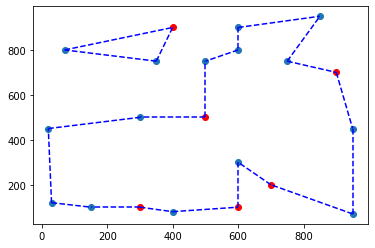

In [9]:
#translate edges in tutte-graph to edges in original graph, and plot
netwrk = []
for i in answer:
    true_edge = (math.ceil(i[0]/numBi), math.ceil(i[1]/numBi))
    netwrk += [true_edge]
    
Network = []
for i in netwrk:
    if i[0] != i[1]:
        Network += [i]
        
total_weight = 0 #judge this solution

edges_to_plot = []
for i in Network:
    cords = [Verts.loc[i[0]][0], Verts.loc[i[1]][0]]
    total_weight += Distance(cords[0], cords[1])
    cords_wobld = the_wobler(cords)
    edges_to_plot += [cords_wobld]

print(total_weight)

xs = [Data['coords'][i][0] for i in range(6)]
ys = [Data['coords'][i][1] for i in range(6)]
plt.scatter(xs, ys, c='red')
xs = [Data['coords'][i][0] for i in range(6,len(Data['coords']))]
ys = [Data['coords'][i][1] for i in range(6,len(Data['coords']))]
plt.scatter(xs, ys)
for i in range(len(edges_to_plot)):
    xx = edges_to_plot[i][0]
    yy = edges_to_plot[i][1]
    plt.plot(xx, yy,'b', linestyle = '--')
plt.savefig('step 1')
plt.show()


# Here we start doing Lagrangian relax

In [10]:
answer2 = answer
while answer2 == answer:
    #find the sol.
    G =nx.Graph()
    G.add_weighted_edges_from(Edges)
    answer2 = sorted(nx.max_weight_matching(G))
    
    #modify lengths. All edges in undersupplied circuits, and edges connected to unnecesary plants in an over-supplied circuit.
    edges_to_change = [(4, 20), (9,21)]

    for i in edges_to_change:
        edge_to_change=i
        index = find_edge(edge_to_change)
        Edges[index] = (Edges[index][0], Edges[index][1], Edges[index][2]*1.01) #lets do 1% change for now 
answer = answer2

## Max flow code from Geeks for geeks : https://www.geeksforgeeks.org/ford-fulkerson-algorithm-for-maximum-flow-problem/

In [11]:
# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict
 
# This class represents a directed graph
# using adjacency matrix representation
class Graph:
 
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self. ROW = len(graph)
        # self.COL = len(gr[0])
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent):
 
        # Mark all the vertices as not visited
        visited = [False]*(self.ROW)
 
        # Create a queue for BFS
        queue = []
 
        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
 
         # Standard BFS Loop
        while queue:
 
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)
 
            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                      # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
 
        # We didn't reach sink in BFS starting
        # from source, so return false
        return False
             
     
    # Returns the maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):
 
        # This array is filled by BFS and to store path
        parent = [-1]*(self.ROW)
 
        max_flow = 0 # There is no flow initially
 
        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :
 
            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s !=  source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]
 
            # Add path flow to overall flow
            max_flow +=  path_flow
 
            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
 
        return max_flow
 

In [133]:
graph = [[0, 900, 500, 1200, 450, 750, 1200, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,1000,0,0,1000,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,1000,0,1000,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,1000,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0,0,1000,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,1000,0,0,0,0,0,0],
        [0,1000,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,200],
        [0,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300],
        [0,0,0,1000,0,0,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,200],
        [0,0,0,0,0,0,0,1000,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,250],
        [0,0,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300],
        [0,0,0,0,0,0,0,0,0,0,1000,0,0,1000,0,0,0,0,0,0,0,0,250],
        [0,0,0,0,0,1000,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,300],
        [0,0,0,0,1000,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,300],
        [0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,250],
        [0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,150],
        [0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0,0,250],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,1000,0,0,300],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0,1000,100],
        [0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,250],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,1000,0,250],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [134]:
#check if well supplied

graph2 = copy.deepcopy(graph)
g = Graph(graph2)
source = 0; sink = 22
print ("The max possible flow is %d " % g.FordFulkerson(source, sink))


The max possible flow is 3650 


In [148]:
#check for robustness, brute force method, lack of time to make someting better.
#breaks an edge and checks for max flow, gives you the edges that, once broken, make the graph not well supplied anymore.
graph3 = copy.deepcopy(graph)
graph3[1][12]=1000
graph3[12][1]=1000
graph3[5][17]=2000
graph3[17][5]=2000
Q=[]
for i in range(1, 22):
    for j in range(i+1, 22):
        graph2 = copy.deepcopy(graph3)
        graph2[i][j]=graph2[i][j]-1000
        graph2[j][i]=graph2[j][i]-1000
        g = Graph(graph2)
        source = 0; sink = 22
        if g.FordFulkerson(source, sink) != 3650:
            Q+=[(i,j)]
        
Q        

[]

In [136]:
#chech comnbinations of edges, gives you the ones that make the graph robust, but some are overkill

PQ = power_set(Q)[1:]
lenPQ = len(PQ)
S=[]

for sett in PQ:
    graph2 = copy.deepcopy(graph) 
    for e in sett:
        graph2[e[0]][e[1]]= graph2[e[0]][e[1]]+1000
        graph2[e[1]][e[0]]= graph2[e[1]][e[0]]+1000
    Q2=[]
    for i in range(1, 22):
        for j in range(i+1, 22):
            graph3 = copy.deepcopy(graph2)
            graph3[i][j]=graph3[i][j]-1000
            graph3[j][i]=graph3[j][i]-1000
            g = Graph(graph3)
            source = 0; sink = 22
            if g.FordFulkerson(source, sink) != 3650:
                Q2+=[(i,j)]
    if not Q2:
        S += [sett]

In [141]:
#calculate the costs:

for sett in S:
    total_weight = 0
    for i in sett:
        cords = [Verts.loc[i[0]][0], Verts.loc[i[1]][0]]
        total_weight += Distance(cords[0], cords[1])
    print(sett, total_weight)
    
#check mannually which is cheapest
New_edges = [(1, 7), (5, 17), (7, 10)] 

[(1, 7), (3, 9), (4, 20), (7, 10)] 711.5491896864908
[(1, 7), (5, 17), (7, 10)] 521.6552506059644
[(1, 7), (3, 9), (5, 17), (7, 10)] 803.4353066780718
[(1, 7), (4, 20), (5, 17), (7, 10)] 679.7691336143833
[(1, 7), (3, 9), (4, 20), (5, 17), (7, 10)] 961.5491896864908
[(1, 7), (3, 9), (4, 20), (9, 14)] 969.8939390805264
[(1, 7), (3, 9), (4, 20), (5, 17), (9, 14)] 1219.8939390805263
[(1, 7), (3, 9), (4, 20), (7, 10), (9, 14)] 1091.5491896864908
[(1, 7), (5, 17), (7, 10), (9, 14)] 901.6552506059644
[(1, 7), (3, 9), (5, 17), (7, 10), (9, 14)] 1183.4353066780718
[(1, 7), (4, 20), (5, 17), (7, 10), (9, 14)] 1059.7691336143835
[(1, 7), (3, 9), (4, 20), (5, 17), (7, 10), (9, 14)] 1341.5491896864908
[(1, 7), (3, 9), (4, 20), (7, 10), (20, 21)] 935.1559874364698
[(1, 7), (5, 17), (7, 10), (20, 21)] 745.2620483559433
[(1, 7), (3, 9), (5, 17), (7, 10), (20, 21)] 1027.0421044280508
[(1, 7), (4, 20), (5, 17), (7, 10), (20, 21)] 903.3759313643623
[(1, 7), (3, 9), (4, 20), (5, 17), (7, 10), (20, 21)] 1

In [125]:
q2=[a]
if not q2:
    print(2)

In [153]:
VertsSteiner = [(206.4, 141.3), (108.2, 215.2), (200, 200), (350, 788.2)]

In [158]:
Network2=[
 (1, 8),
 (3, 11),
 (4, 14),
 (5, 13),
 (8, 2),
 (9, 3),
 (11, 2),
 (12, 13),
 (14, 9),
 (16, 6),
 (18, 17),
 (19, 18),
 (19, 21),
 (20, 4),
 (20, 21),]

3552.1484820713335


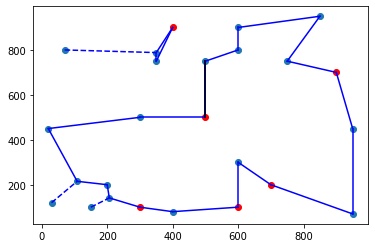

In [168]:
total_weight = 0 #judge this solution

edges_to_plot = []
for i in Network2:
    cords = [Verts.loc[i[0]][0], Verts.loc[i[1]][0]]
    total_weight += Distance(cords[0], cords[1])
    cords_wobld = the_wobler(cords)
    edges_to_plot += [cords_wobld]

xs = [Data['coords'][i][0] for i in range(6)]
ys = [Data['coords'][i][1] for i in range(6)]
plt.scatter(xs, ys, c='red')
xs = [Data['coords'][i][0] for i in range(6,len(Data['coords']))] + [206.4, 108.2, 200, 350 ]
ys = [Data['coords'][i][1] for i in range(6,len(Data['coords']))] + [141.3, 215.2,  200,  788.2 ]
plt.scatter(xs, ys)

for i in range(len(edges_to_plot)):
    xx = edges_to_plot[i][0]
    yy = edges_to_plot[i][1]
    plt.plot(xx, yy,'b', linestyle = '-')
    
plt.plot([200, 108.2] ,[200, 215.2] ,'b', linestyle = '-')
plt.plot( [200, 206.4],[200, 141.3] ,'b', linestyle = '-')
plt.plot( [350, 350],[750, 788.2] ,'b', linestyle = '-')
plt.plot( [350, 400],[788.2, 900] ,'b', linestyle = '-')
plt.plot( [70, 350],[800, 788.2] ,'b', linestyle = '--')

plt.plot( [20, 108.2],[450, 215.2] ,'b', linestyle = '-')
plt.plot( [30, 108.2],[120, 215.2] ,'b', linestyle = '--')
plt.plot( [300, 206.4],[100, 141.3] ,'b', linestyle = '-')
plt.plot( [150, 206.4],[100, 141.3] ,'b', linestyle = '--')

plt.plot( [500, 500], [500, 750], 'k')

plt.savefig('step 5')
plt.show()
